In [1]:
import framework as fr
from filters.blur import *
from filters.distributions import *
from filters.noise import *
from algorithms.richardson_lucy import RihardsonLucy
from algorithms.MAP import MAP
from algorithms.HQMotionBlurRestoration.HQMBR import HQMBR
from algorithms.HQMotionBlurRestoration.convolve  import create_line_psf

from algorithms.test_algorithm import TestAlgorithm
from algorithms.test2_algorithm import TestAlgorithm2
from algorithms.test3_algorithm import TestAlgorithm3

import cv2 as cv
import numpy as np

In [2]:
tmp = fr.frame('images','blured','restored') #создание фреймворка и папок с картинками (images - изначальные, blured - смазанные и зашумленные, restored - обработанные/восстановленные)

# tmp.changescale(True) #задать цветные(true)/серые(false) картинки

tmp.read_all() #загрузить все из папки 'images' в фрейм ворк

# tmp.read_one('image1.jpeg') #загрузить одну картинку из папки с определенным названием
# tmp.read_one('max.jpg') #загрузить одну картинку из папки с определенным названием
# tmp.read_one('train.jpg') #загрузить одну картинку из папки с определенным названием
# tmp.read_one('saturn.jpg')

# tmp.bind('images\picassoBlurImage.png', 'images\picassoBlurImage.png', color=False)

# tmp.bind(<оригинальное>,<смазанное>,color) #добаляет связку оригинального и смазанного изображения (путь указывать целиком)

# tmp.show_original() #выводит все оригинальные картинки через cv.imshow //не очень удобно

In [3]:
fl1 = GaussianNoise(10)    #фильтры для разных шумов и смазов (см. абстрактный класс filter.FILTER_BASE)
fl2 = PoissonNoise(0.1)
fl4 = SaltAndPepperNoise([1,1,100000])
fl8 = DefocusBlur(gaussian_distribution, param=10,kernel_size = 15)
fl9 = MotionBlur(gaussian_distribution, param=100.0,angle=0,kernel_length=51)

In [4]:
predict = cv.getGaussianKernel(15,1)
predict_1 = predict / predict[0,0]
predict_2 = predict_1 @ predict_1.T
predict_3 = predict_2 / sum(predict_2)
# display(predict_3)

# test = np.array([[0.0, 0.0, 0.0],[0.0, 1.0, 0.0], [0.0, 0.0, 0.0]])

predict_4 = np.array([[0,0,0,0,0,0,1],[0,0,0,0,0,1,0],[0,0,0,0,1,0,0],[0,0,0,1,0,0,0],[0,0,1,0,0,0,0],[0,1,0,0,0,0,0],[1,0,0,0,0,0,0]],dtype=np.float16)
predict_5 = predict_4 / np.sum(predict_4)

predict_6 = np.zeros((31,31),dtype=np.float16)
predict_6[:,:] += 1
predict_6[16,:] += 15
predict_7 = predict_6 / sum(predict_6)
# display(predict_7)
predict_8 = create_line_psf(-np.pi/4, 1, (27, 27))

alg_rl = RihardsonLucy({'psf': predict_3,'iter': 5, 'eps': 1e-8, 'm': 200, 'r':1})

In [5]:
# display(predict_8)

In [6]:
operator = np.array([[-0.5, -1.0, -0.5],[-1.0, 6.0, -1.0],[-0.5, -1.0, -0.5]])
alg_map = MAP(max_iter=200,Huber_threshold=0.008,predict_kernel=predict_3,operator=operator,relaxation_factor=0.06,eps = 0.000001)

In [7]:
alg_hqmbr = HQMBR(1,predict_psf= predict_8, MAX_ITER=5)

In [8]:
alg_test1 = TestAlgorithm()
alg_test2 = TestAlgorithm2()
alg_test3 = TestAlgorithm3()

In [ ]:
# tmp.full_process([fl8],[alg_hqmbr])
# tmp.full_process([fl8],[alg_map, alg_hqmbr, alg_rl])
# tmp.full_process([fl8],[alg_hqmbr])

# tmp.full_process([],[alg_map])
# tmp.process(alg_hqmbr)


tmp.full_process([[fl9,fl4],[fl8,fl1]],[alg_test1,alg_test2,alg_hqmbr],size=0.5)
# tmp.show(size = 0.75)

In [ ]:
# tmp.full_process([fl8,fl5,fl4],[alg1,alg2],1.0) #пайплайн из наложения смазов и восстановления заданными методами, нахождение лучшего и худшего и их вывод

In [ ]:
# tmp.filter(fl1)
# tmp.filter(fl2)

# tmp.show()
# tmp.process(alg_test1)
# tmp.process(alg_test2)
# tmp.show()

# tmp.save_filter()
# tmp.filter(fl4)
# tmp.filter(fl8)
# tmp.filter(fl9)
# tmp.show()
# tmp.process(alg_test3)
# tmp.show()

# tmp.save_filter()
# tmp.load_filter(0)
# tmp.show()

# tmp.process(alg_rl)

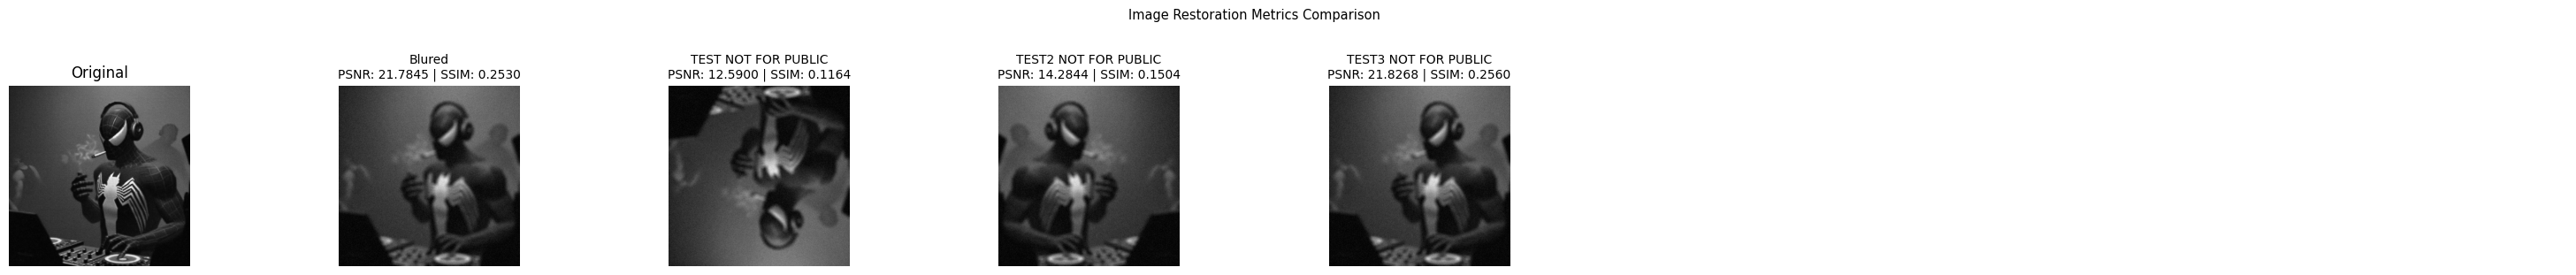

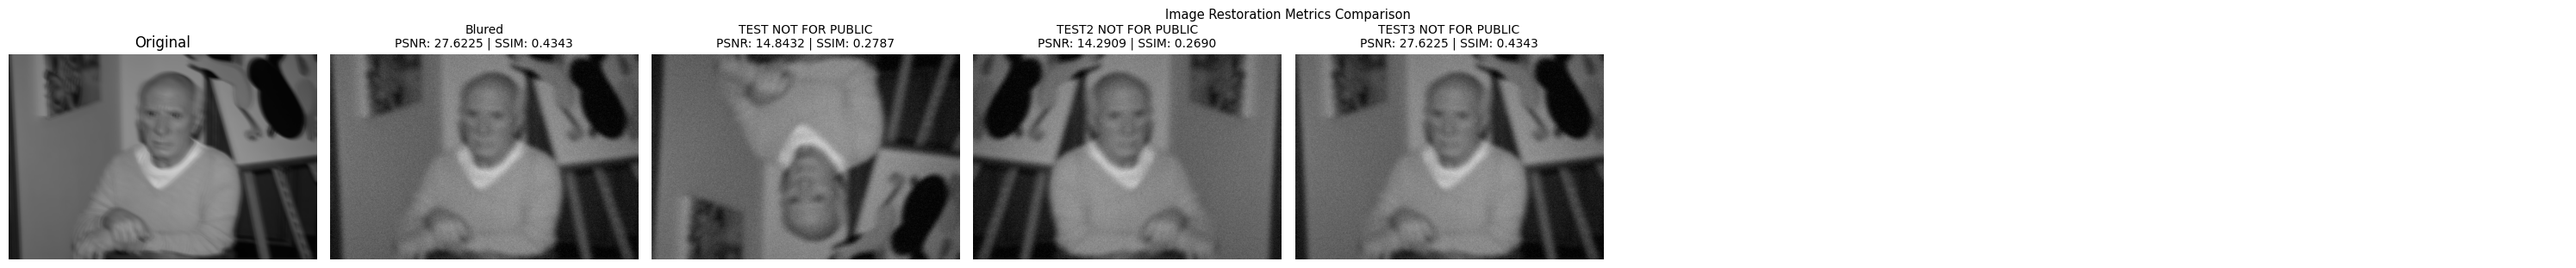

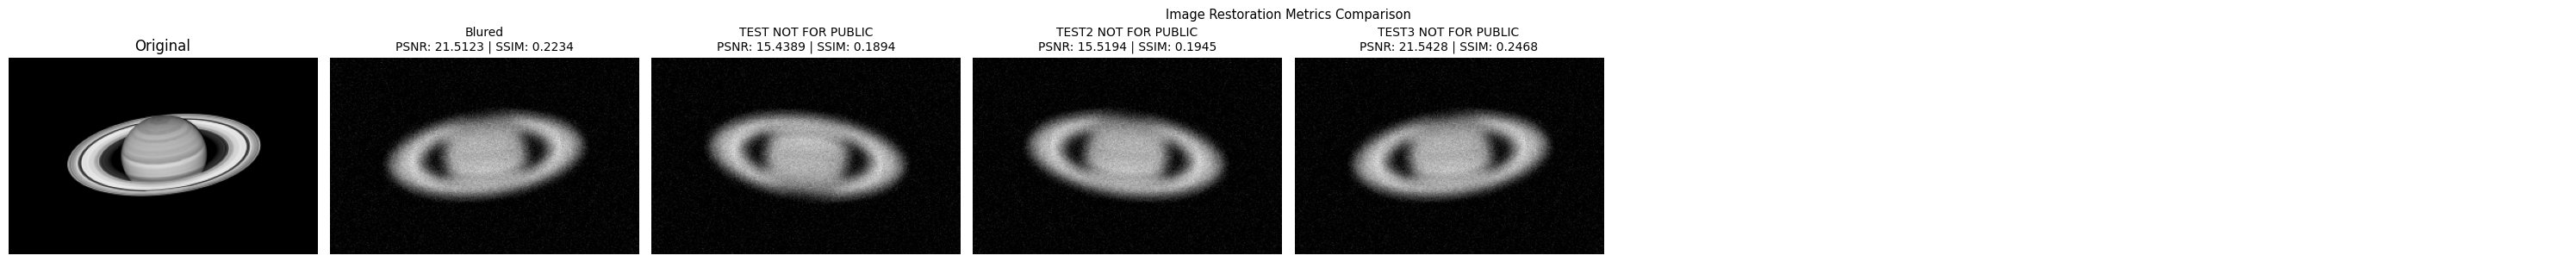

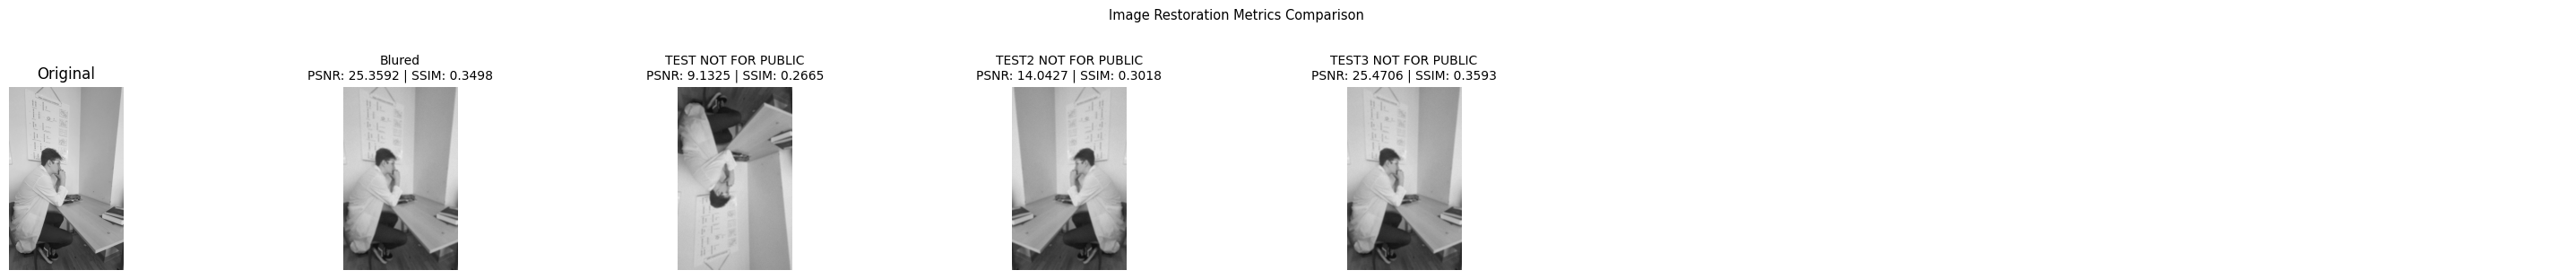

In [ ]:
# tmp.show_blured() #выводит все смазанные картинки через cv.imshow //не очень удобно
# tmp.show_restored() #выводит все восстановленные картинки через cv.imshow //не очень удобно
tmp.show(size = 0.75) #выводит картинки следующим образом: оригинал | смазанное + метрики | востановленное + метрики ...

In [ ]:
# a = [ i[0] for i in tmp.get_metrics()] # получить метрики в массиве (если надо будет)

# print([i for i in enumerate(a)])

# print(max( [max(i) for i in a ]))

In [ ]:
tmp.clear_output() #удаляет все привязанные отфильрованные и восстановленные картинки
tmp.reset() #в теории убирает привязку к отфильтрованным и восстановленным картинкам
tmp.clear_input() #убирает привязку ко всем загруженным картинкам (загружать надо заново)


In [10]:
tmp.clear_output_directory() # УДАЛЯЕТ ВООБЩЕ ВСЕ из директорий с отфильрованными и восстановленными картинками + reset()